# Implementation of the AVL Tree
From the course repository.
Link: https://github.com/ivanovitchm/datastructure/blob/main/lessons/week_02/AVL.ipynb

In [ ]:
# solved exercise

class Node:
    """
    A class representing a node in a Binary Search Tree (BST).

    Each node contains a value and references to its left and right children.
    """

    def __init__(self, value):
        """
        Initializes a Node with a given value.

        Parameters:
        - value: The value to be stored in the node.

        Both left and right child references are initialized as None.
        """
        self.value = value
        self.left_child = None
        self.right_child = None


class BST:
    """
    Represents a Binary Search Tree (BST).

    Attributes:
        root (Node or None): The root node of the tree. Initializes to None for an empty tree.
    """

    def __init__(self):
        """Initializes an empty BST."""
        self.root = None

    def add(self, value):
        """
        Inserts a new value into the BST.

        Args:
            value: The value to be added to the tree.

        If the tree is empty, the value becomes the root. Otherwise, the method uses
        a recursive helper function to find the appropriate position to maintain the BST property.
        """
        if self.root is None:
            self.root = Node(value)
        else:
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        Recursively finds the correct position and inserts a value into the BST.

        Args:
            current_node (Node): The node to start the search for the insert position from.
            value: The value to be added to the BST.

        The method determines if the new value should be placed to the left or right of
        the current node. If the target position is empty, the value is inserted.
        Otherwise, the function calls itself recursively with the respective child node.
        """
        if value <= current_node.value:
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        Recursively checks if the BST contains the specified value starting from a given node.

        Args:
            current_node (Node): The node to start the search from.
            value: The value to search for in the BST.

        Returns:
            bool: True if the value exists in the subtree rooted at current_node, otherwise False.
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Checks if the BST contains the specified value.

        Args:
            value: The value to search for in the BST.

        Returns:
            bool: True if the BST contains the value, otherwise False.
        """
        return self._contains(self.root, value)

In [ ]:
# solved exercise

class AVLNode(Node):
    """
    Represents a node in an AVL (Adelson-Velsky and Landis) tree,
    which is a self-balancing binary search tree.

    Attributes:
        height (int): The height of the subtree rooted at this node,
                      initializes to 1 when the node is created.
        imbalance (int): The imbalance factor of this node, calculated
                         as the difference between the heights of the left
                         and right subtrees. Initializes to 0.

    Inherits from:
        Node: Inherits attributes and methods from the Node class.
    """

    def __init__(self, value):
        """
        Initializes an AVLNode with a given value.

        Args:
            value: The value to be stored in this node.
        """
        super().__init__(value)
        self.height = 1
        self.imbalance = 0

    def calculate_height_and_imbalance(self):
        """
        Calculates the height and imbalance factor of this node based
        on the heights of its left and right children.

        This method assumes that the heights of the children nodes (if they exist)
        are up-to-date.
        """
        # Calculate the height of the left child subtree
        left_height = 0
        if self.left_child is not None:
            left_height = self.left_child.height

        # Calculate the height of the right child subtree
        right_height = 0
        if self.right_child is not None:
            right_height = self.right_child.height

        # Update the height of this node
        self.height = 1 + max(left_height, right_height)

        # Calculate and update the imbalance factor for this node
        self.imbalance = left_height - right_height

In [ ]:
# Solved Exercise

class AVLTree(BST):
    """
    Represents an AVL (Adelson-Velsky and Landis) tree, a self-balancing binary search tree.
    Inherits all attributes and methods from the BST class and overrides some to maintain the AVL balance property.

    Attributes:
        Inherits all attributes from the BST class.
    """

    def __init__(self):
        """
        Initializes an empty AVL Tree.
        """
        super().__init__()

    def add(self, value):
        """
        Overrides the add method in the BST class to handle AVL Tree balancing.
        """
        self.root = self._add_recursive(self.root, value)  # Note that self.root is updated here


    def _add_recursive(self, current_node, value):
        """
        Overrides the BST method to recursively find the correct position and insert a value into the AVL tree.
        This method also ensures the tree remains balanced by updating node heights and performing rotations as needed.

        Args:
            current_node (AVLNode or Node or None): The node from which to start the search for the insert position.
            value (Any): The value to be added to the AVL tree.

        Returns:
            AVLNode: The node that either gets inserted or the node that was already present at that position.

        Notes:
            1. The method first checks if the `current_node` is an instance of the base class `Node`.
              If it is, the method casts it to `AVLNode` to ensure AVL properties are maintained. This is especially
              useful if the first node added to the tree is of type `Node`; this ensures subsequent nodes will be of
              type `AVLNode`.
            2. The method also balances the tree by calling the `_balance` method if the imbalance factor
              of a node reaches 2 or -2 after an insert operation.
        """

        # If the current node is None, return a new AVLNode containing the value
        if current_node is None:
            return AVLNode(value)

        # Check if current_node is of the base class Node and cast it to AVLNode if necessary
        # This is necessary to not change the add() in the BST class.
        # When the first node is added, the type of the root is Node, so we need to cast it
        if isinstance(current_node, Node) and not isinstance(current_node, AVLNode):
            current_node = AVLNode(current_node.value)
            current_node.left_child = self.root.left_child
            current_node.right_child = self.root.right_child
            self.root = current_node

        # Determine whether the value should be inserted to the left or right subtree
        if value <= current_node.value:
            current_node.left_child = self._add_recursive(current_node.left_child, value)
        else:
            current_node.right_child = self._add_recursive(current_node.right_child, value)

        # Update the height and imbalance factor for the current node
        current_node.calculate_height_and_imbalance()

        # Check if tree balancing is needed and balance if necessary
        if abs(current_node.imbalance) == 2:
            return self._balance(current_node)

        return current_node

    def get_height(self):
        """
        Retrieves the height of the AVL Tree.

        Returns:
            int: The height of the tree rooted at self.root. Returns 0 if the tree is empty.
        """
        if self.root is None:
            return 0
        return self.root.height

    def _rotate_left(self, node):
        """
        Performs a left rotation on the given node and adjusts the height and imbalance attributes.

        A left rotation is used to balance an AVL Tree when the right subtree of a node
        becomes higher than the left subtree. The method updates the heights and imbalance
        factors for the rotated nodes.

        Args:
            node (AVLNode): The node to be rotated.

        Returns:
            AVLNode: The new root node of the rotated subtree (the pivot).
        """

        # Store the pivot (the root of the right subtree of 'node')
        pivot = node.right_child

        # Update the right child of 'node' to be the left child of the pivot
        node.right_child = pivot.left_child

        # Set the left child of the pivot to be the node
        pivot.left_child = node

        # Recalculate the height and imbalance factor for the rotated node
        node.calculate_height_and_imbalance()

        # Recalculate the height and imbalance factor for the pivot
        pivot.calculate_height_and_imbalance()

        # Return the pivot as the new root of this subtree
        return pivot


    def _rotate_right(self, node):
        """
        Performs a right rotation on the given node and adjusts the height and imbalance attributes.

        A right rotation is used to balance an AVL Tree when the left subtree of a node
        becomes higher than the right subtree. This method updates the heights and imbalance
        factors for the rotated nodes.

        Args:
            node (AVLNode): The node around which the rotation will be performed.

        Returns:
            AVLNode: The new root node of the rotated subtree (the pivot).
        """

        # Store the pivot (the root of the left subtree of 'node')
        pivot = node.left_child

        # Update the left child of 'node' to be the right child of the pivot
        node.left_child = pivot.right_child

        # Set the right child of the pivot to be the node
        pivot.right_child = node

        # Recalculate the height and imbalance factor for the rotated node
        node.calculate_height_and_imbalance()

        # Recalculate the height and imbalance factor for the pivot
        pivot.calculate_height_and_imbalance()

        # Return the pivot as the new root of this subtree
        return pivot

    def _balance(self, node):
      """
      Balances the subtree rooted at the given node by performing rotations as needed.

      If the imbalance factor of the given node is 2 or -2, rotations are performed
      to bring the subtree back into balance. This method also takes into account
      the imbalance factors of the child nodes to decide which type of rotation is needed
      (single or double).

      Args:
          node (AVLNode): The root node of the subtree that needs to be balanced.

      Returns:
          AVLNode: The new root node of the balanced subtree.

      Note:
          This method assumes that the height and imbalance factor of each node are up-to-date.
      """

      # Case 1: Left subtree is higher than right subtree
      if node.imbalance == 2:
          pivot = node.left_child
          # Single right rotation
          if pivot.imbalance == 1:
              return self._rotate_right(node)
          # Double rotation: Left-Right
          else:
              node.left_child = self._rotate_left(pivot)
              return self._rotate_right(node)
      # Case 2: Right subtree is higher than left subtree
      else:
          pivot = node.right_child
          # Single left rotation
          if pivot.imbalance == -1:
              return self._rotate_left(node)
          # Double rotation: Right-Left
          else:
              node.right_child = self._rotate_right(pivot)
              return self._rotate_left(node)

# Setup

In [ ]:
!python -m spacy download pt_core_news_sm
!pip install streamlit
!pip install streamlit_jupyter
import spacy as spc
import streamlit as st
from streamlit_jupyter import StreamlitPatcher
StreamlitPatcher().jupyter()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 20.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling pa

In [ ]:
nlp = spc.load("pt_core_news_sm")

In [ ]:
teste = "Teste dos tokens aí ó, batata martelo Grécia abacate Abacate maçã Rodrigo ashsrd aaaaa os as eles 33    a"

In [ ]:
filtrado = nlp(teste)

In [ ]:
print(f"Word\t\t|usual?|stop?\t|punc.?\t|num.?\t|space?")
print(80*"-")
for w in filtrado: print(f"{w}\t\t|{w.ent_type==0}\t|{w.is_stop}\t|{w.is_punct}\t|{w.is_digit}\t|{w.is_space}\t|{w.text.lower()}")

Word		|usual?|stop?	|punc.?	|num.?	|space?
--------------------------------------------------------------------------------
Teste		|True	|False	|False	|False	|False	|teste
dos		|True	|True	|False	|False	|False	|dos
tokens		|True	|False	|False	|False	|False	|tokens
aí		|True	|True	|False	|False	|False	|aí
ó		|True	|False	|False	|False	|False	|ó
,		|True	|False	|True	|False	|False	|,
batata		|True	|False	|False	|False	|False	|batata
martelo		|True	|False	|False	|False	|False	|martelo
Grécia		|False	|False	|False	|False	|False	|grécia
abacate		|True	|False	|False	|False	|False	|abacate
Abacate		|False	|False	|False	|False	|False	|abacate
maçã		|True	|False	|False	|False	|False	|maçã
Rodrigo		|False	|False	|False	|False	|False	|rodrigo
ashsrd		|True	|False	|False	|False	|False	|ashsrd
aaaaa		|True	|False	|False	|False	|False	|aaaaa
os		|True	|True	|False	|False	|False	|os
as		|True	|True	|False	|False	|False	|as
eles		|True	|True	|False	|False	|False	|eles
33		|True	|False	|False	|True	|Fa

In [ ]:
[w.text.lower() for w in filtrado if w.ent_type==0 and not (w.is_stop or w.is_punct or w.is_digit or w.is_space)]

['teste',
 'tokens',
 'ó',
 'batata',
 'martelo',
 'abacate',
 'maçã',
 'ashsrd',
 'aaaaa']

## Downloading the corpus
It will be "Cancioneiro", from Fernando Pessoa to a more common text.
And, for recreative purposes, "Carta de hum cidadam de Genova a hum seu correspondente em Londres", obtained in Project Gutenberg: https://www.gutenberg.org/cache/epub/18528/pg18528.txt


In [ ]:
!curl https://raw.githubusercontent.com/Marcos7765/AEDII/main/Tarefa1/cancioneiro.txt > cancioneiro.txt
!curl https://raw.githubusercontent.com/Marcos7765/AEDII/main/Tarefa1/carta.txt > carta.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 51328  100 51328    0     0   200k      0 --:--:-- --:--:-- --:--:--  201k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22405  100 22405    0     0   105k      0 --:--:-- --:--:-- --:--:--  106k


In [ ]:
with open("cancioneiro.txt", "r") as file:
  texto = "".join(file.readlines())
proc = nlp(texto)
unicas = []
extraFiltro=set("<>-0123456789()[]")
for w in proc:
    if w.ent_type==0 and not (w.is_stop or w.is_punct or w.is_digit or w.is_space):
        if not (extraFiltro & set(w.text)):
          cand = w.text.lower()
          if not cand in unicas:
              unicas.append(cand)
print(unicas)
print(f"Total words: {len(unicas)}")

['lâmpada', 'acesa', 'acendeu', 'beleza', 'chão', 'deserto', 'sonhar', 'incerto', 'círculo', 'ondear', 'sombra', 'luz', 'oscila', 'sonho', 'conduz', 'dia', 'sorria', 'vi', 'silente', 'vagamente', 'ó', 'noite', 'eterna', 'braços', 'filho', 'rei', 'voluntariamente', 'abandonei', 'trono', 'sonhos', 'cansaços', 'espada', 'pesada', 'lassos', 'mão', 'viris', 'calmas', 'entreguei', 'cetro', 'coroa', 'deixei', 'antecâmara', 'feitos', 'pedaços', 'cota', 'malha', 'inútil', 'esporas', 'tinir', 'fútil', 'fria', 'escadaria', 'realeza', 'corpo', 'alma', 'regressei', 'antiga', 'calma', 'paisagem', 'morrer', 'arte', 'esquece', 'olhar', 'olhando', 'súbito', 'bate', 'encontro', 'devaneando', 'sério', 'correr', 'repente', 'oco', 'pensar', 'mundo', 'redor', 'fica', 'exterior', 'ficar', 'some', 'ligar', 'idéia', 'nome', 'mim', 'terra', 'céus', 'sonha', 'papel', 'transparente', 'canto', 'pirâmides', 'bico', 'pena', 'perfil', 'paro', 'escureceu', 'abismo', 'feito', 'soterrado', 'escrever', 'versos', 'clara',

In [ ]:
with open("carta.txt", "r") as file:
  texto = "".join(file.readlines())
proc = nlp(texto)
unicas1 = []
for w in proc:
    if w.ent_type==0 and not (w.is_stop or w.is_punct or w.is_digit or w.is_space):
      if not (extraFiltro & set(w.text)):
          cand = w.text.lower()
          if not cand in unicas1:
              unicas1.append(cand)
print(unicas1)
print(f"Total words: {len(unicas1)}")

['hum', 'cidadam', 'correspondente', 'fataés', 'eventos', 'presente', 'guerra', 'entendo', 'serà', 'v.m', 'duvida', 'havido', 'digno', 'ponderaçaõ', 'dia', 'horror', 'vi', 'principio', 'delle', 'faltaria', 'empenhos', 'amizade', 'deixasse', 'participalo', 'individuarlhe', 'cauzas', 'originou', 'narrarlhe', 'sinceramente', 'factos', 'essenciaes', 'compoz', 'jà', 'constaràõ', 'artigos', 'intimados', 'ella', 'achasse', 'occasiaõ', 'constrangida', 'submeterse', 'quaesquer', 'ditadas', 'superiorïdade', 'forças', 'sofriaõ', 'mào', 'animo', 'naõ', 'conhecerem', 'quam', 'graves', 'indecorosas', 'fossem', 'naçaõ', 'crerem', 'totalmente', 'alheyas', 'maximas', 'generosas', 'dita', 'extremamente', 'commum', 'sentimento', 'setembro', 'foraõ', 'intimadas', 'general', 'exorbitantes', 'contribuições', 'milhões', 'cruzados', 'ferro', 'fogo', 'sacco', 'irreparavelmente', 'ameaçava', 'caso', 'repulsa', 'encheo', 'ira', 'terror', 'considerando', 'vidas', 'fazendas', 'liberdade', 'dependia', 'petitorios',

# Initializing the structures
We will also fill them and gather their insertion time data.

In [ ]:
from timeit import default_timer as timer
from bisect import insort_left, bisect_left
Ntentativas = 100
lista = []
tentativas= {'avl':[], 'bst':[], 'list':[]}
bests= {'avl':{'insert':float('inf'),'search':float('inf')},
        'bst':{'insert':float('inf'),'search':float('inf')},
        'list':{'insert':float('inf'),'search':float('inf')},
        }

def add_e_timing(container, addfunc, tempos):
  for i in range(Ntentativas):
    cont = container()
    start = timer()
    for w in unicas:
      addfunc(cont, w)
    end = timer()
    tempos.append(end-start)
  return cont

avl = add_e_timing(AVLTree, AVLTree.add, tentativas['avl'])
bst = add_e_timing(BST, BST.add, tentativas['bst'])
lista = add_e_timing(list, insort_left, tentativas['list'])

bests['avl']['insert'] = min(tentativas['avl'])
bests['bst']['insert'] = min(tentativas['bst'])
bests['list']['insert'] = min(tentativas['list'])

print(avl.get_height())

def get_height(node):
    #recurrent function to get the height of a bst
    if not node.left_child:
        left_height = 0
    else:
        left_height = get_height(node.left_child)
    if not node.right_child:
        right_height = 0
    else:
        right_height = get_height(node.right_child)
    return max(left_height, right_height) + 1

print(get_height(bst.root))
#just for sanity
print(get_height(avl.root))

13
22
13


# Creating the methods

In [ ]:
#made it for avl, ended up that it is the same for the bst
def AVL_buscaPrefixada(node, prefix, res):
    valor = node.value
    # all words starting with the prefix should be equal or higher than it
    if prefix > valor:
        if node.right_child:
            return AVL_buscaPrefixada(node.right_child, prefix, res)
        return False
    # all words that are higher than the prefix and doesnt start with them will
    # always be higher than any words with the prefix
    if not valor.startswith(prefix):
        if node.left_child:
            return AVL_buscaPrefixada(node.left_child, prefix, res)
        return False
    # remaining case: starts with prefix
    # both sides could have another word with the prefix
    res.append(valor)
    if node.left_child: AVL_buscaPrefixada(node.left_child, prefix, res)
    if node.right_child: AVL_buscaPrefixada(node.right_child, prefix, res)
    return True

def lista_buscaPrefixada(lista, prefix):
    # uses bisection to get where words starting with the prefix should be and
    #goes adding them while there are words with it
    res = []
    i = bisect_left(lista,prefix)
    max = len(lista)
    while(True):
        if not lista[i].startswith(prefix):
            break
        res.append(lista[i])
        i += 1
        if i >= max: break
    return res

In [ ]:
# visual test
print("excerpt of the original list:")
print(lista[8:15])
print(80*"-")
comecaCom = lambda prefix: [x for x in filter(lambda a: a.startswith(prefix), lista)]
print("startswith reference:")
print(comecaCom("abs"))
print(80*"-")
res = []
print("AVL:")
print(AVL_buscaPrefixada(avl.root, "abs", res))
print(res)
print(80*"-")
print("sorted list:")
print(lista_buscaPrefixada(lista, "abs"))

excerpt of the original list:
['abrande', 'absoluta', 'absolutamente', 'absorto', 'absorve', 'absurdo', 'acaba']
--------------------------------------------------------------------------------
startswith reference:
['absoluta', 'absolutamente', 'absorto', 'absorve', 'absurdo']
--------------------------------------------------------------------------------
AVL:
True
['absolutamente', 'absoluta', 'absurdo', 'absorve', 'absorto']
--------------------------------------------------------------------------------
sorted list:
['absoluta', 'absolutamente', 'absorto', 'absorve', 'absurdo']


In [ ]:
# testaço
# if you wanna test the test, you can insert something on res that wouldn't
#appear anyway e.g "" or "0"
alfabeto = "abcdefghijklmnopqrstuvwxyz"
for letra in alfabeto:
    res = []
    AVL_buscaPrefixada(avl.root, letra, res)
    if comecaCom(letra) != sorted(res):
        raise Exception(f"Something went wrong on the AVL!\n {comecaCom(letra)}\n {sorted(res)}")
    if comecaCom(letra) != sorted(lista_buscaPrefixada(lista, letra)):
        raise Exception(f"Something went wrong on the list!\n {comecaCom(letra)}\n {sorted(res)}")
print("It's alright :)")

It's alright :)


In [ ]:
res = []
AVL_buscaPrefixada(avl.root, "", res)
print(len(res))
print(len(lista))

1647
1647


# Measuring search time

In [ ]:
buscas = {'avl':[], 'bst':[], 'list':[]}
for i in range(Ntentativas):
    res = []
    start = timer()
    for letra in alfabeto:
        AVL_buscaPrefixada(avl.root, letra, res)
    end = timer()
    buscas['avl'].append(end-start)
for i in range(Ntentativas):
    res = []
    start = timer()
    for letra in alfabeto:
        AVL_buscaPrefixada(bst.root, letra, res)
    end = timer()
    buscas['bst'].append(end-start)
for i in range(Ntentativas):
    res = []
    start = timer()
    for letra in alfabeto:
        lista_buscaPrefixada(lista, letra)
    end = timer()
    buscas['list'].append(end-start)

bests['avl']['search'] = min(buscas['avl'])
bests['bst']['search'] = min(buscas['bst'])
bests['list']['search'] = min(buscas['list'])

# Comparison visualization

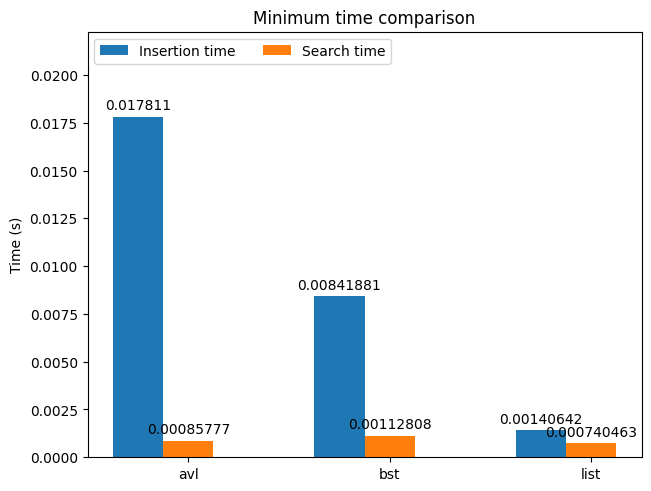

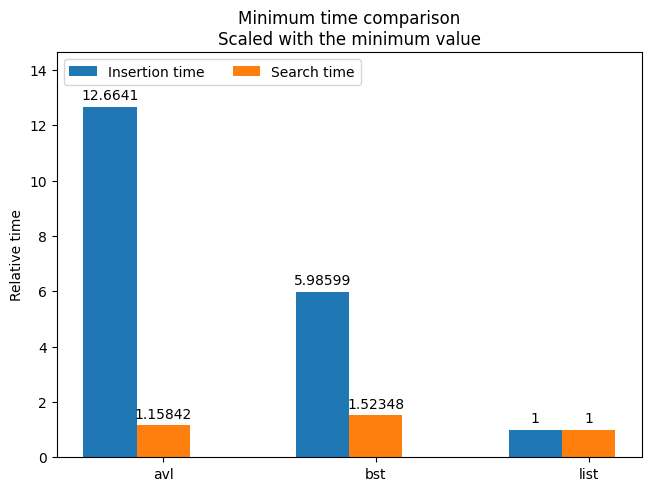

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

methodNames = bests.keys()

minima = {
    'Insertion time': [bests[x]['insert'] for x in methodNames],
    'Search time': [bests[x]['search'] for x in methodNames]
}

x = np.arange(len(methodNames))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in minima.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('Minimum time comparison')
ax.set_xticks(x + width, methodNames)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(minima['Insertion time']+minima['Search time'])*1.25)

plt.show()

fig, ax = plt.subplots(layout='constrained')
multiplier = 0

for attribute, measurement in minima.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [a/min(measurement) for a in measurement], width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative time')
ax.set_title('Minimum time comparison\nScaled with the minimum value')
ax.set_xticks(x + width, methodNames)
ax.legend(loc='upper left', ncols=len(minima.keys()))
ax.set_ylim(0, ax.get_ylim()[1]*1.1)

plt.show()

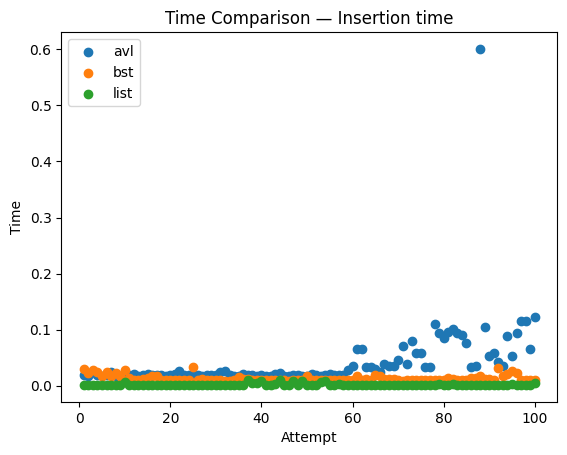

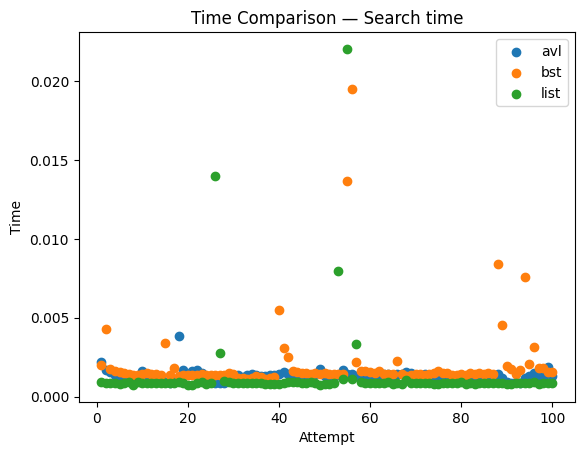

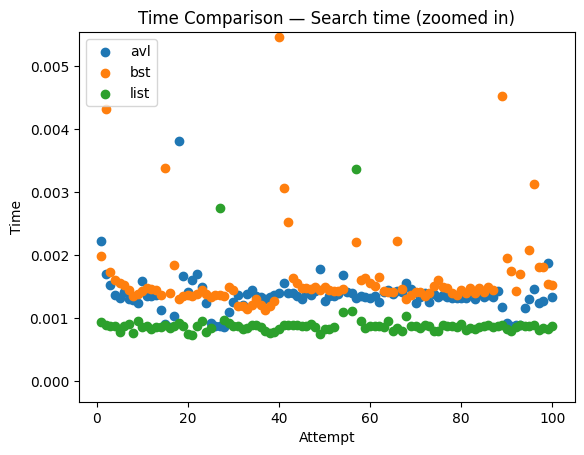

In [ ]:
for key, values in tentativas.items():
    plt.scatter(range(1, len(values) + 1), values, label=key)

# Add labels and legend
plt.xlabel('Attempt')
plt.ylabel('Time')
plt.title('Time Comparison — Insertion time')
plt.legend()

# Show the plot
plt.show()

for key, values in buscas.items():
    plt.scatter(range(1, len(values) + 1), values, label=key)

# Add labels and legend
plt.xlabel('Attempt')
plt.ylabel('Time')
plt.title('Time Comparison — Search time')
plt.legend()

# Show the plot
plt.show()

fig, ax = plt.subplots()
for key, values in buscas.items():
    plt.scatter(range(1, len(values) + 1), values, label=key)

# Add labels and legend
plt.xlabel('Attempt')
plt.ylabel('Time')
plt.title('Time Comparison — Search time (zoomed in)')
plt.legend()
#ax.set_ylim(0, ax.get_ylim()[1]*1.1)
ss, se = ax.get_ylim()
ax.set_ylim(ss, ss+ (se-ss)/4)
# Show the plot

plt.show()

# Now it is time for the interactive demonstration!

In [ ]:
import ipywidgets as ipw
Ntentativas = 1
avl = add_e_timing(AVLTree, AVLTree.add, tentativas['avl'])
def acwrapper(Text:str):
    '''wrapper of the AVL_buscaPrefixada to the autocomplete'''
    res = []
    prefix = Text.split(" ")[-1]
    if prefix == '': return "No start of word detected."
    AVL_buscaPrefixada(avl.root, prefix, res)
    return ", ".join(res)
ipw.interact(acwrapper, Text="Write something!")

interactive(children=(Text(value='Write something!', description='Text'), Output()), _dom_classes=('widget-int…

<function __main__.acwrapper(Text: str)>

In [ ]:
#execute this cell to corpus (and rebuild the tree)
Ntentativas = 1
tempos = []
temp = unicas
unicas = unicas1
unicas1 = temp
avl = add_e_timing(AVLTree, AVLTree.add, tentativas['avl'])